# About me

**Guest Lecturer**: Jeff Parker. 

**Date of Lecture**: Tuesday, Feb 25th, 2020.

**Role**: Lead Data Scientist @ Qualtrics (a survey software company)

**What I do**: Clients pay our team to help design, create and analyze surveys ran on the Qualtrics software. Projects are pricing studies, product development, feature prioritization and roadmapping and behavioral economics. Methodologies include Conjoint, MaxDiff, Segmentation, TURF, Key Driver Analysis and Predictive Markets.

**How I do it**: My team primarily work in R, Python and SPSS. Our client deliverables are typically Excel and PowerPoint with the occasional RShiny dashboard.

**Clients I've worked with**: I've worked with pretty much every big name company and companies across every industry:
* Big Tech: Google, Facebook, Amazon
* Finance: SoFi, Capital One, Bank of America
* Consumer Goods: Peloton, Burton, General Mills, Budweiser, Coca Cola
* Healthcare: Surgical Equipment Manufacturers, Aetna Insurance
* Startups: Drones, Recreational Marijuana, Vertical Farming
* Obscure: Doorknobs, Fire Hydrants

**Prior to Qualtrics**: MS Northwestern's Masters of Analytics program. BS Utah State University in Economics. Cicero Group (a consulting company)

**Outside of Work**
* 8th Generation Utahn
* Ski, snowboard, bike, fish, canoe
* Fix old bikes, cars and furniture. Done a few remodels.
* Hang out with Zeke, 2 years old (picture queue'd up)
* Tinkered around with [blogging](https://jeffreyxparker.github.io/), data competitions, and contributing to some open source packages (`psm`, `qualtRics`, `ggtheme`)


# Thought Experiment
What are the reasons you decided to attend Lambda?

How does Lambda compare to alternatives?

What makes elements of a Lambda course make it a great course?

How to your current course stack up on these elements?

When going to a sporting event, what makes it's a great experience?

What can sports teams do to keep fans coming to games, even when the team isn't winning?

Suggestion: Google Atlanta Falcons stadium or listen [here](https://www.npr.org/transcripts/749517025)

# What is Key Driver Analysis

Surveys are big business. It's a thing.

Market Research is a the act of using surveys to gather **research** on your **market**. Market Research is a whole field of study and profession. Generally, market researchers use surveys to gain insight on new products, brand sentiments and customer satisfaction. Survey respondents may be people who respondent to an email, call or prompt. However, survey respondents may be compensated to get more niche groups. Compensation may take the form of video game credits/upgrades or gift cards and cash.

Key Driver Analysis is a methodology branded in market research, called Shapley or Relative Weights Analysis in Data Science. Key Drivers Analysis identifies how much each of the predictor variables (the drivers) are moving the depentor variable (key metric, key performance indicator aka KPI). In other words, "what are the **drivers** of your **key** metric?"

**Key Driver Analysis tells you the importance of your predictor variables (independent) on your outcome variable (dependent). It's especially useful when you have highly correllated predictor variables.**

### Common uses cases in market research

* **Liklihood-to-recommend**: Prioritizing brand perceptions so they have the most impact
* **Consideration**: What is going to get millenials to think about purchasing our product?
* **Usability**: What makes Apple products so darn easy to use?
* **Preception**: Which of the many features is actually impacting overall perceptions?
* **Satisfaction**: Is it the nurse, the doctor or the facility that is driving overall experience?

### Other use cases out side of market research

* **Ecommerce**: What served content on a website will most impact a purchase?
* **Call Centers**: What wait times and agent interactions will lead to a angry caller?
* **Politics**: What candidate attributes (not policy) will contribute to people's likelihood-to-vote
* **Ad Spend**: Spending money on Facebook ads, Google SEO, Email campaigns and more. Which are worth it?
* **Attribution**: How do we determine our sales reps commissions? Sometimes they have a hand in other reps sales?

### Picking your **key** metric

In market research, key drivers that companies tend to focus on include:
* **Likelihood-to-recommend / NPS**: "How likely on a scale from 0-10 to recommend this brand/product to a friend, family member or collegue?"
* **Consideration**: "Which of the following brands/products would you consider purchasing?"
* **Usability**: "How easy or hard is to use this product on a scale from 1 being easy to 5 being hard?"
* **Satisfaction**: "How satisfied are you with this product on a scale from 1-Very Satisfied to 7-Very Unsatisfied"?

Key Metrics **must** be numeric and can be binary responses (e.g., consideration: 75\% of respondents would consider our product) or scales (e.g., likelihood-to-recommend: company average is 7.5 out of 10). You can't have any missing values in your dependent variable. Take note of the scale: should go from worst -> best.

Overall, it's best to have a few hundred responses or observations.

### Picking your **drivers**

Drivers are should be correllated with the key metric (and we will see that as part of the analysis). Key Driver Analysis really tries to point the finger and say "X is *causing* Y". 

![Correlation versuse Causation](https://imgs.xkcd.com/comics/cell_phones.png)

![Spurious Correlations](https://tylervigen.com/correlation_project/correlation_images/pedestrians-killed-in-collision-with-railway-train_precipitation-in-howard-county-mo.png)

Credits: http://xkcd.com, https://tylervigen.com/

So *drivers* should actually be **driving** a higher level outcomes. 

* **Pereceptions**:"On a scale 1-5, please rate the brand in terms of performance, cost, durability, visual appeal, etc.")
* **Emotional reactions**: "On a scale 1-5, please indicate how well the product fits your needs, is good value, is designed for you, etc."
* **Sub level ratings**: "On a scale 1-5, please indivate how friendly were the nurses, how clean was the room, how swift was the check-in process, ect."
* **Product features**: "Which of the follow features did you use?"

Key Metrics **must** be numeric and can be binary responses or scales. You **can** have missing values in your independent variables (dependending on the method), but sometimes it's easier to just delete them. Take note of the scale: should go from worst -> best so you may need to recode the values.

### What's in a name

Market Researchers tend to sit closer to business folks and tend to think a lot about "brand" and "product". So Market Researchers tend to have clever names for many of the same methodologies used in the data science world. A few examples:
* Product Optimizer (Heirarchical Bayes Estimation)
* Key Driver Analysis (Linear, Logitistical Regresion, Shapely Analysis, Relatives Weights Analysis)
* Price Sensitivity Meter (Cumulative sums)
* Experience Management (Market Research)

There is a lesson to be learned here about salesmanship of data science methods. **Give your analysis method a catchy name that laymans can easily understand and easily repeat. Productize your services.**

Names matter. Give your analysis a compelling name and acronym.

Data Scientist sell "services" and "products". If you make your services sound impactful, you are more likely to "sell" (e.g., get buy-in). Linear Regression is drab and boring... and anyone can do it in Excel. But Key Drivers Analysis sounds cool and exciting.

# About the data and an example

Source: https://data.austintexas.gov/City-Government/Airport-Quarterly-Passenger-Survey/dvu8-ztdx

> Results from Austin-Bergstrom International Airport's customer surveys. Surveys are tallied and reported quarterly to help ABIA improve general customer satisfaction as well as to target specific areas for improvement.

Sample Size: ~3,500 respondents collected quarterly from Q1-2015 to Q4-2017

In [164]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# https://pypi.org/project/relativeImp/
from relativeImp import relativeImp

In [45]:
# Load in Data
survey_responses = pd.read_csv("airport-quarterly-passenger-survey-1.csv")  
survey_responses.head(5)

,Quarter,Date recorded,Departure time,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,...,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
0,3Q16,09/04/2016,11:45,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,4.0,0.0,4.0,5.0,4.0,4.0,0.0,0.0,0.0
1,2Q16,05/01/2016,16:45,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0
2,2Q16,04/07/2016,11:10,4.0,4.0,4.0,5.0,5.0,5.0,5.0,...,0.0,5.0,5.0,5.0,5.0,5.0,NaN,0.0,5.0,0.0
3,3Q16,09/02/2016,17:16,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0
4,3Q16,08/04/2016,7:49,5.0,0.0,0.0,0.0,4.0,4.0,4.0,...,2.0,4.0,4.0,2.0,5.0,4.0,4.0,0.0,4.0,0.0


In [46]:
# Munge the Data

# Select only the columns we are interested in
survey_responses = survey_responses.drop(columns=['Quarter', 'Date recorded', 'Departure time'])

# Scales are normally 1-5. Hypothesis is that a 0 means the a respondent saw the question, but didn't answer or ansered NA
# Changing all 0 to NaN
survey_responses[survey_responses.eq(0)] = np.nan

# Drop missing values dependent variables
survey_responses = survey_responses.dropna(subset=['Overall satisfaction'])

survey_responses.head(5)

,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,...,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
151,NaN,2.0,1.0,NaN,NaN,NaN,NaN,5.0,5.0,1.0,...,NaN,5.0,5.0,4.0,5.0,5.0,5.0,5.0,NaN,5.0
155,4.0,NaN,NaN,NaN,3.0,4.0,4.0,3.0,4.0,4.0,...,NaN,3.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0
351,5.0,NaN,NaN,NaN,4.0,4.0,4.0,3.0,4.0,5.0,...,NaN,4.0,5.0,5.0,4.0,5.0,5.0,4.0,NaN,3.0
373,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
646,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,2.0,3.0


In [185]:
# Dependent variable
yName =  'Overall satisfaction'

# Independent Variables (all related to speed)
xNames = ['Check-in wait time',
          'Wait time at passport inspection',
          'Wait time of security inspection',
          'Speed of baggage delivery',
          'Efficiency of check-in staff']

results = relativeImp(survey_responses, outcomeName = yName, driverNames = xNames)
results

,driver,rawRelaImpt,normRelaImpt
0,Check-in wait time,0.047324,13.920997
1,Wait time at passport inspection,0.077577,22.820215
2,Wait time of security inspection,0.072228,21.246809
3,Speed of baggage delivery,0.085748,25.223919
4,Efficiency of check-in staff,0.057070,16.788061


In [167]:
sum(results.rawRelaImpt) # R-squared

# What is a good R-squared?
# <.3 is not good
# .3 - .4 is normal
# .4 - .5 is great
# .5 - .6 is exceptional
# >.6 is dangerously high, possibly overfitting

0.33994646959050734

In [168]:
sum(results.normRelaImpt) # It is the percentage of variance each predictor explains.

# The Feature Importance sums to 100%.

100.00000000000001

# Why multicollinearity is bad

Multicollinearity is a big problem in survey data. The same question may be asked several different ways:
* Check-in wait time
* Efficiency of check-in staff

Or the response data may just be naturally correllated:
* Arrivals passport and visa inspection
* Ground transportation to/from airport

When you have highly correllated independent variables, sometimes a linear model might attribute variance in the dependent variable to the first, and other times the linear model might attribute variance in the dependent variable to the second. It produces **unstable** and **imprecise** beta coefficents.

Question: So which is in fact actually causing the variance?

Answer: Shapely Regression (used in KDA) can tell you.

### Naturally Correllated

In [127]:
survey_responses.corr()

,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,...,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
Ground transportation to/from airport,1.000000,0.625591,0.432510,0.521955,0.325881,0.324284,0.346555,0.225822,0.268725,0.285984,...,0.471022,0.350891,0.347225,0.335100,0.334766,0.321246,0.752882,0.326014,0.451908,0.402015
Parking facilities,0.625591,1.000000,0.641027,0.533904,0.388541,0.339357,0.418903,0.255001,0.357789,0.389321,...,0.455083,0.416402,0.407940,0.372582,0.350606,0.329255,0.493962,0.369509,0.228682,0.443928
Parking facilities (value for money),0.432510,0.641027,1.000000,0.599175,0.341791,0.313231,0.328092,0.275341,0.319885,0.310248,...,0.413976,0.396259,0.378280,0.403531,0.337262,0.314662,0.397276,0.375108,0.783349,0.414464
Availability of baggage carts,0.521955,0.533904,0.599175,1.000000,0.407616,0.385254,0.393605,0.342308,0.378692,0.377454,...,0.590780,0.462843,0.510805,0.525656,0.417297,0.435625,0.583585,0.388447,0.393843,0.491060
Efficiency of check-in staff,0.325881,0.388541,0.341791,0.407616,1.000000,0.770771,0.724697,0.581406,0.549727,0.527869,...,0.344395,0.396470,0.385763,0.361690,0.391188,0.324846,0.422933,0.353990,0.332587,0.448765
Check-in wait time,0.324284,0.339357,0.313231,0.385254,0.770771,1.000000,0.756951,0.522426,0.524291,0.494471,...,0.270860,0.370002,0.339168,0.337125,0.364566,0.316700,0.200770,0.306665,0.072154,0.412487
Courtesy of of check-in staff,0.346555,0.418903,0.328092,0.393605,0.724697,0.756951,1.000000,0.522463,0.599233,0.535316,...,0.283844,0.379649,0.386408,0.363860,0.397806,0.358471,0.351879,0.325580,0.203440,0.448587
Wait time at passport inspection,0.225822,0.255001,0.275341,0.342308,0.581406,0.522426,0.522463,1.000000,0.713851,0.610668,...,0.367132,0.391918,0.360768,0.358362,0.423356,0.359016,0.333302,0.345373,0.352533,0.477968
Courtesy of inspection staff,0.268725,0.357789,0.319885,0.378692,0.549727,0.524291,0.599233,0.713851,1.000000,0.761726,...,0.409911,0.410788,0.386797,0.389232,0.418553,0.351654,0.463390,0.364850,0.422163,0.483955
Courtesy of security staff,0.285984,0.389321,0.310248,0.377454,0.527869,0.494471,0.535316,0.610668,0.761726,1.000000,...,0.339133,0.415981,0.389517,0.417167,0.440223,0.406567,0.491605,0.370645,0.441237,0.500644


### Same question, asked differently, definitely correlated

In [186]:
cor_test = survey_responses[['Check-in wait time','Efficiency of check-in staff']].dropna()
cor_test.corr()

,Check-in wait time,Efficiency of check-in staff
Check-in wait time,1.000000,0.770771
Efficiency of check-in staff,0.770771,1.000000


### An Example of Unstable and Imprecise Results

In [179]:
comp_cases = survey_responses[['Check-in wait time',
          'Wait time at passport inspection',
          'Wait time of security inspection',
          'Speed of baggage delivery',
          'Efficiency of check-in staff',
            'Overall satisfaction']].dropna()

test1 = comp_cases.sample(n=500)
test2 = comp_cases.sample(n=500)

In [180]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [181]:
X1 = test1.drop(columns=['Overall satisfaction'])
X2 = test2.drop(columns=['Overall satisfaction'])

X1 = X1.to_numpy()
X2 = X2.to_numpy()

y1 = test1['Overall satisfaction']
y2 = test2['Overall satisfaction']

y1 = y1.to_numpy()
y2 = y2.to_numpy()

In [182]:
model.fit(X1, y1)
print(model.coef_)
print(model.score(X1, y1))

[0.06931586 0.12615592 0.19414885 0.15683612 0.11226323]
0.3976847180012265


In [183]:
model.fit(X2, y2)
print(model.coef_)
print(model.score(X2, y2))

[0.04782546 0.16916221 0.14729948 0.14936143 0.17095566]
0.3993889917343799


With Multicollinearity, we get really unstable results. A client would lose it if one month you said "It's the staff efficency that's most important" and then the next month, nothings change but you say "Actually, it's the efficiency of the process."

# How Shapley (and Key Driver Analysis) solves for multicollinearity

* Shapley has it roots in game theory and attribution in the 1950s.
* Shapley seeks to explain what percent of the variance explained (R-squared), a predictor contributes
* It produces **relative importance** which is the marginal contribution (relative to the other predictors) a predictor adds
* It does this by running through all the possible premutations of models

**Model**|**R2  for predicting X**
:-----:|:-----:
 | 
ABC|0.5877
AB|0.5823
AC|0.4251
BC|0.5478
A|0.3306
B|0.5403
C|0.2442

#### Shapley Value (A)
=  [(R2ABC - R2BC) + [(R2AC - R2C) + (R2AB - R2B)]/2 + R2A)]/3 

=  [(0.5877-0.5478) + [(0.4251-0.2442) + (0.5823-0.5403)]/2 +0.3306)]/3

=  [0.0399 + (0.1809 + 0.0420)/2 + 0.3306]/3

=  0.1607

#### Shapley Value (B) 
=  [(R2ABC - R2AC) + [(R2AB - R2A) + (R2BC - R2C)]/2 + R2B)]/3

=  [(0.5877-0.4251) + [(0.5823-0.3306) + (0.5478-0.2442)]/2 +0.5403)]/3 

=  [0.1626 + (0.2517 + 0.3036)/2 + 0.5403]/3

=  0.3268

#### Shapley Value (C) 
=  [(R2ABC - R2AB) + [(R2AC - R2A) + (R2BC - R2B)]/2 + R2C)]/3

=  [(0.5877-0.5823) + [(0.4251-0.3306) + (0.5478-0.5403)]/2 +0.2442)]/3 

=  [0.0054 + (0.0945 + 0.0075)/2 + 0.2442]/3

=  0.1002

**R2ABC = Shapley Value (A) + Shapley Value (B) + Shapley Value (C)**

0.5877 = 0.1607 + 0.3268 + 0.1002

(Isn't this amazing!)


### Questions and Answers

Question: What happens when you add more predictor variables?
    
Answer: The model permuations increase and it can take forever. Try running `relativeImp` with all 33 predictor variables. What happens?

Question: Are there alternatives to Shapley?

Answer: Yes! A method called Relative Weights Analysis (RWA) produces the same Relative Importance scores as Shapley, but it is way faster for large models. These are psuedo-Relative Importance scores and the math is not as intuitive, but if the end is the same, does the means matter?

Question: What else can Shapley be used for?

Answer: Lots of use cases. Determining the importance of your features in a model (should you remove a predictor variable). Explaining models to non-technical audiences. Attribution modeling.

Question: Can Shapley be used on models other than Linear Regression?

Answer: Yes! It's excellent for explaining "black box" models. 

### Visulizing the results

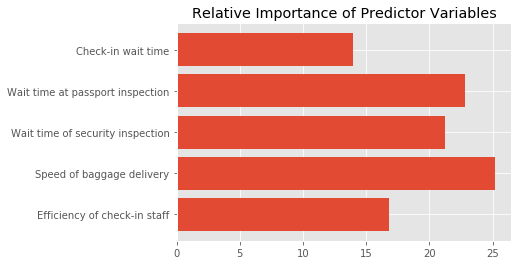

In [133]:
# Plot the relative Importance
fig, ax = plt.subplots()

ax.barh(results.driver, results.normRelaImpt)
ax.invert_yaxis() 
ax.set_title('Relative Importance of Predictor Variables')

plt.show()

### Common Pitfalls
* Including too many variables
* Sometimes Shapley coefficents (not included in this python package) can sum to a value higher than is possible on the dependent variable. In other words, if you move all the predictor variables to 5, then the dependent variable moves to 6. In market research, this really isn't a problem, because companies will never be able to get to perfect 5's.
* The scales of the predictor variables may be different, or may be a binary. Shapely uses "standardized" coefficients versus "unstandardized". Make sure you know what you are working with when making explanations.
* NaNs are common in *some* aspects of market research. So be sure you know how you are handling them.

# Another example
Choosing all the variables are related to the the atomosphere of the airport.

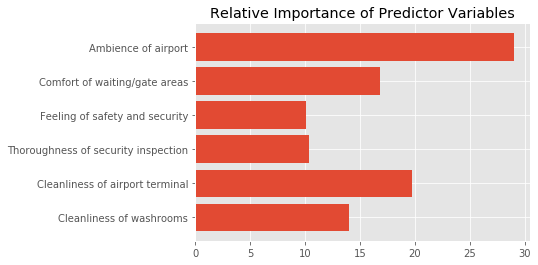

In [184]:
# Dependent variable
yName =  'Overall satisfaction'

# Independent Variables (all related to atomsphere)
xNames = ['Ambience of airport',
          'Comfort of waiting/gate areas',
          'Feeling of safety and security',
          'Thoroughness of security inspection',
          'Cleanliness of airport terminal',
          'Cleanliness of washrooms',]

results = relativeImp(survey_responses, outcomeName = yName, driverNames = xNames)


fig, ax = plt.subplots()

ax.barh(results.driver, results.normRelaImpt)
ax.invert_yaxis() 
ax.set_title('Relative Importance of Predictor Variables')

plt.show()

# Homework
The Chief of Staff at the airport has asked you which employees have the most effect on passenger satisfaction. She knows the scores, but wants to know which to staff group to focus on.